# Fractional Brownian Motion Parameter Estimation Using Periodogram Method

The periodigram method uses the fractional brownian noise power spectrum to estimate the Hurst,</br>
denoted by $H$. The power spectrum is the Fourier transform of the fractional brownian motion noise autocorrelation</br>
function. This relationship is called the Weiner-Khichnin theorem.</br>

Let $Z^H(t)$ denote a fractional path then fractional brownian noise is defined by,

$
\begin{align}
\Delta Z_k^H = Z^H(t_k) - Z^H(t_{k-1})
\end{align}
$

where $t_k = k \Delta t$. It follows that,

$
\begin{align}
Z^H(n\Delta t) = \sum_{i=1}^n \Delta Z_k^H
\end{align}
$

The autocovariance of fractional brownian noise is given by,

$
\begin{align}
\gamma^H_n = \text{Cov}[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Since $\text{Var}(\Delta Z_k^H) = \Delta t^{2H}$ the autocorrelation coefficient is defined by,</br>

$
\begin{align}
\rho^H_n = \frac{\gamma^H_n}{\Delta t^{2H}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

From the Weiner-Khichnin theorem the power spectrum is given by,</br>

$
\begin{align}
\hat{\rho}^H_\omega = \frac{1}{2} \int_{-\infty}^{\infty} \rho^H_n e^{-i \omega n} dn
\end{align}
$

It can be shown that fir $\omega \ggg 1$,

$
\begin{align}
\hat{\rho}^H_\omega \approx C\lvert \omega \rvert^{1 - 2H}
\end{align}
$

where $C$ is independent of $\omega$. It follows that $H$ can be determined by using OLS on $\hat{\rho}^H_\omega$ as a</br>
function of $\omega$.

## Imports

In [49]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plots import (PlotDataType, RegressionPlotType)
from lib.stats import RegressionType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [50]:
Δt = 1.0
npts = 2**10
time = numpy.linspace(0.0, float(npts)*Δt, npts)
ω = numpy.linspace(1.0, npts, npts-1)

## Power Spectrum Simulation H=0.8

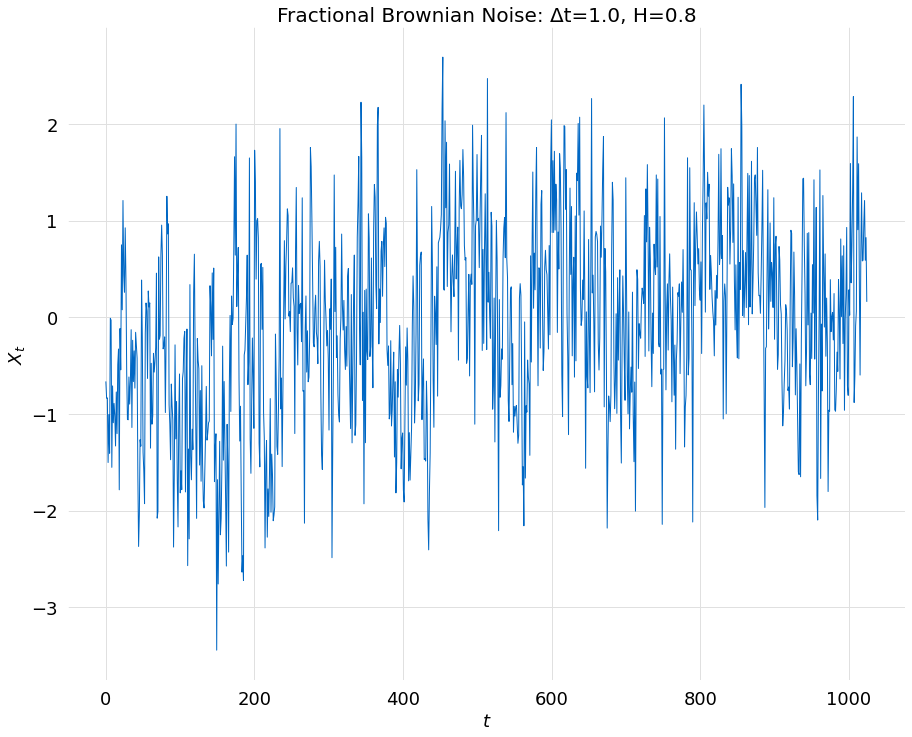

In [51]:
H = 0.8
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.curve(time, samples[:npts], title)

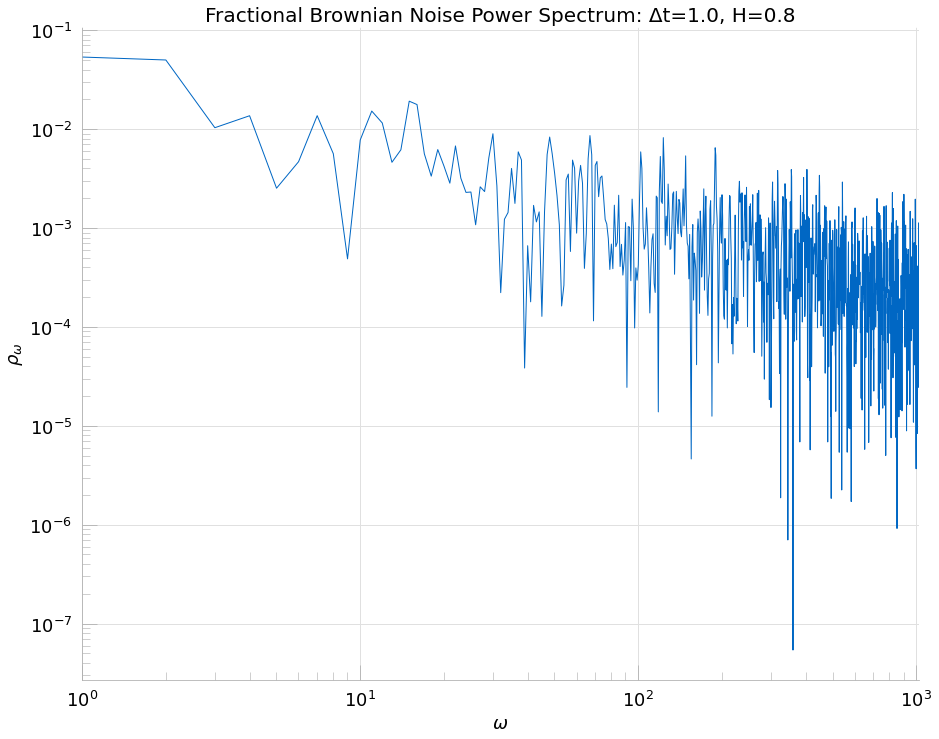

In [52]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.curve(ω, ps, title, data_type=PlotDataType.PSPEC)

In [53]:
results = stats.OLS(ps, ω, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     329.4
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           5.07e-64
Time:                        09:18:47   Log-Likelihood:                -876.88
No. Observations:                1023   AIC:                             1758.
Df Residuals:                    1021   BIC:                             1768.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5006      0.109    -13.769      0.000      -1.714      -1.287
x1            -0.7569      0.042    -18.150      0.000      -0.839      -0.675
==============================================================================
Omnibus:                      259.121   Durbin-Watson:                   1.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.294
Skew:                          -1.257   Prob(JB):                    8.91e-168
Kurtosis:                       6.425   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

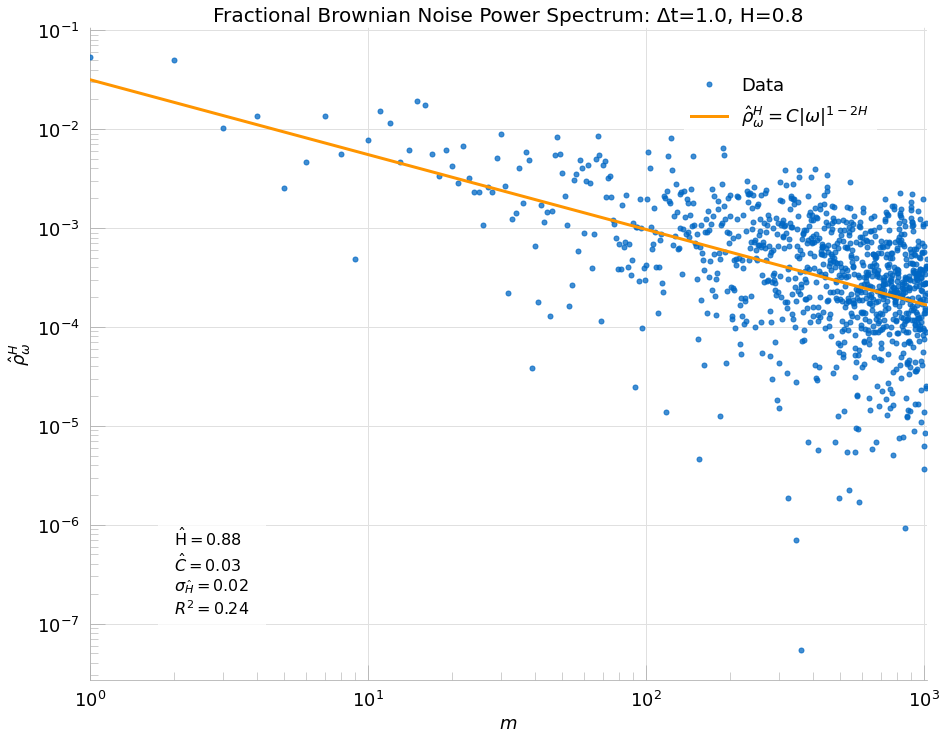

In [54]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.regression(ps, ω, results, title, RegressionPlotType.FBM_PSPEC)

## Power Spectrum Simulation H=0.3

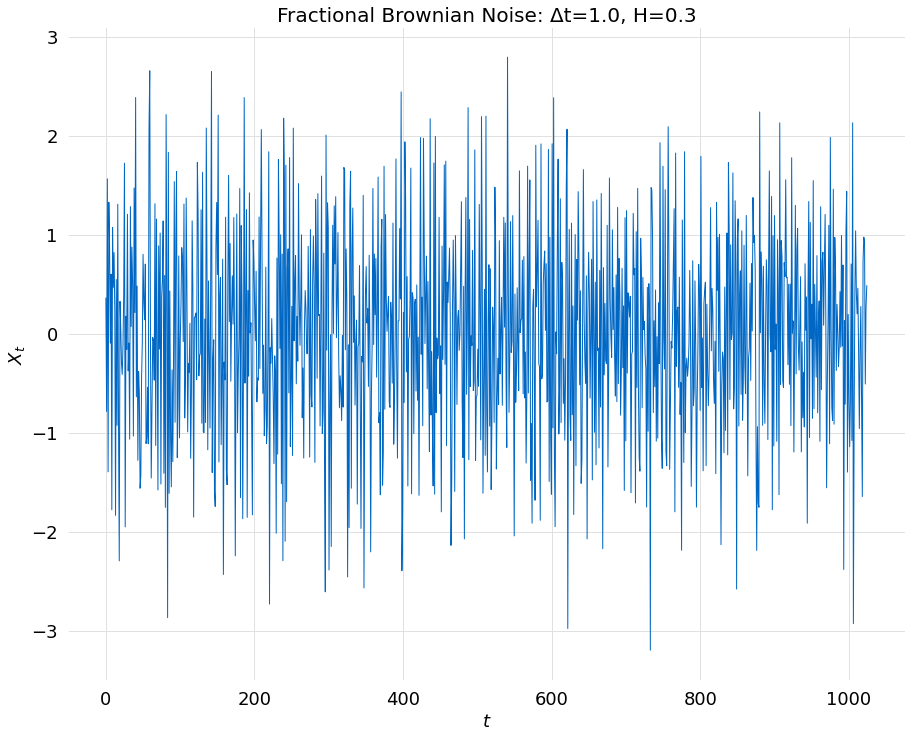

In [55]:
H = 0.3
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
plots.curve(time, samples[:npts], title)

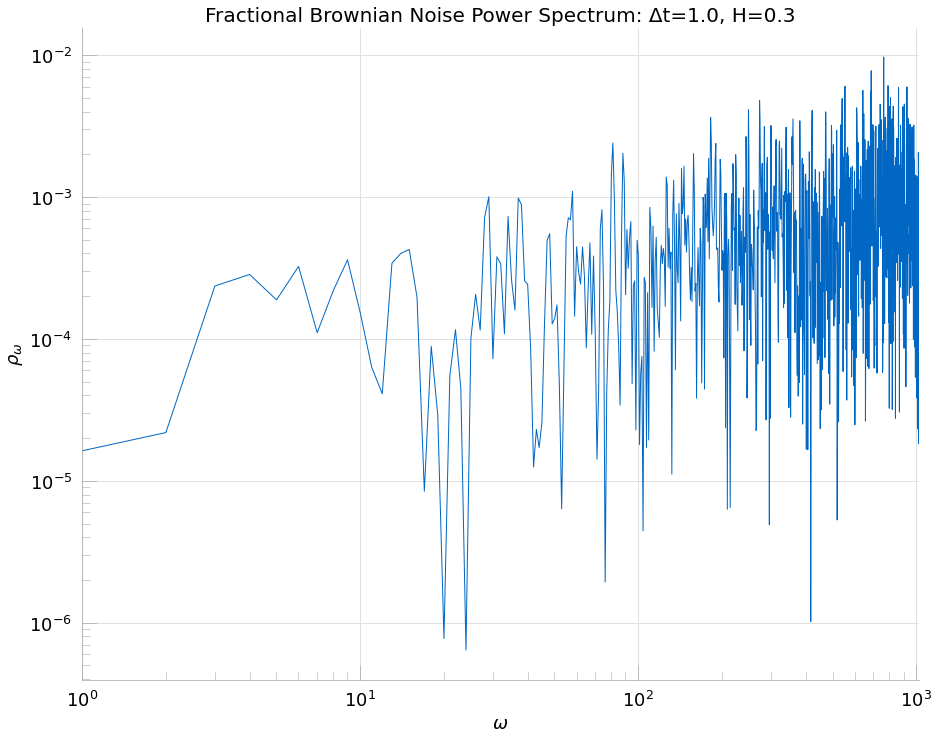

In [56]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.curve(ω, ps, title, data_type=PlotDataType.PSPEC)

In [57]:
results = stats.OLS(ps, ω, RegressionType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     136.7
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           1.02e-29
Time:                        09:18:49   Log-Likelihood:                -856.68
No. Observations:                1023   AIC:                             1717.
Df Residuals:                    1021   BIC:                             1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5364      0.107    -42.457      0.000      -4.746      -4.327
x1             0.4780      0.041     11.690      0.000       0.398       0.558
==============================================================================
Omnibus:                      133.019   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.903
Skew:                          -0.916   Prob(JB):                     1.75e-43
Kurtosis:                       4.124   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

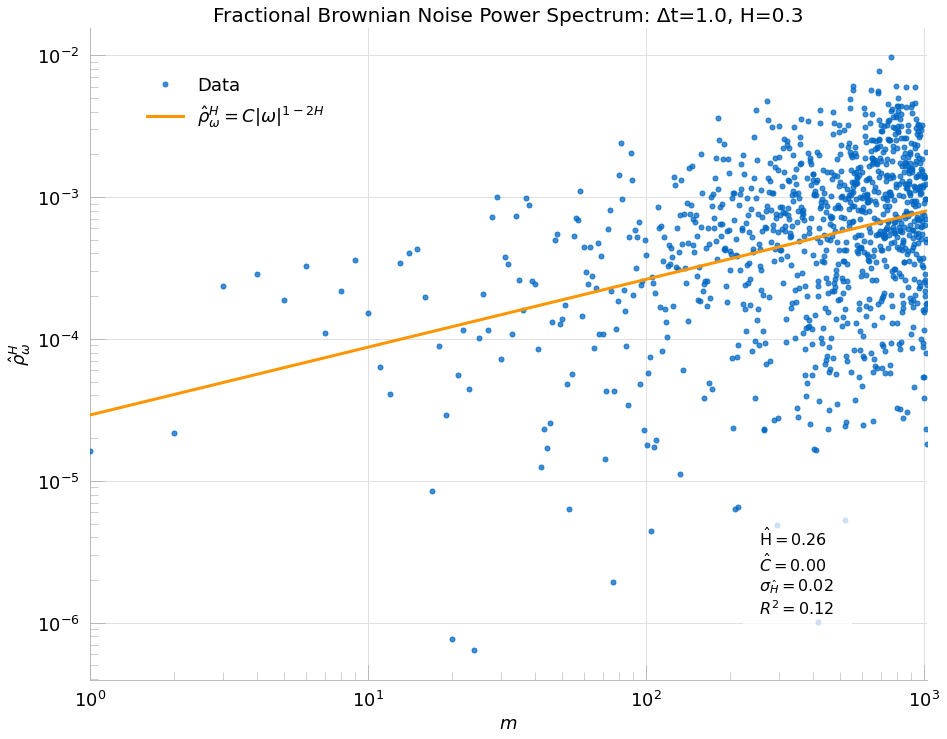

In [58]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
plots.regression(ps, ω, results, title, RegressionPlotType.FBM_PSPEC)